# Clean up

Lo que se pretende es aplicar los conceptos vistos de "Análisis Exploratorio" para limpiar los distintos set de datos proporcionados.

Archivos en: https://www.kaggle.com/benhamner/sf-bay-area-bike-share

Los archivos disponibles son 4:
    * station.csv (8 KB)
    * weather.csv (428 KB)
    * trip.csv    (77 M)
    * status.csv  (1,9 GB)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Station.csv

In [2]:
station = pd.read_csv('station.csv', sep=',', parse_dates=['installation_date'],
                      infer_datetime_format=True,low_memory=False)

### Types

In [3]:
station.dtypes

id                            int64
name                         object
lat                         float64
long                        float64
dock_count                    int64
city                         object
installation_date    datetime64[ns]
dtype: object

### Null values

In [4]:
station.isnull().any()

id                   False
name                 False
lat                  False
long                 False
dock_count           False
city                 False
installation_date    False
dtype: bool

### Size

In [5]:
station.shape

(70, 7)

### Sample

In [6]:
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.33,-121.90,27,San Jose,2013-08-06
1,3,San Jose Civic Center,37.33,-121.89,15,San Jose,2013-08-05
2,4,Santa Clara at Almaden,37.33,-121.89,11,San Jose,2013-08-06
3,5,Adobe on Almaden,37.33,-121.89,19,San Jose,2013-08-05
4,6,San Pedro Square,37.34,-121.89,15,San Jose,2013-08-07


## Weather.csv

In [7]:
weather = pd.read_csv('weather.csv', sep=',', parse_dates=['date'],
                      infer_datetime_format=True,low_memory=False)

### Types

In [8]:
weather.dtypes

date                              datetime64[ns]
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles                     float64
max_wind_Speed_mph                       float64
mean_wind_speed_mph                      float64
max_gust_speed_mph                       float64
precipitation_inches                      object
cloud_cover         

In [9]:
weather['precipitation_inches'].unique()

array(['0', '0.23', 'T', '0.01', '0.28', '0.63', '0.29', '0.06', '0.85',
       '0.09', '0.64', '0.42', '0.35', '0.43', '0.22', '0.74', '0.03',
       '0.12', '0.16', '0.49', '0.17', '0.08', '0.04', '0.53', '0.07',
       '0.02', '0.83', '1.06', '1.71', '0.37', '0.27', '0.45', '0.78',
       '0.88', '0.66', '0.47', '0.1', '0.61', '0.14', '0.05', '0.68',
       '0.97', '0.26', '0.15', '0.87', '0.57', '0.69', '0.32', '0.21',
       '0.24', '0.52', '0.36', '0.33', '0.25', '0.11', '0.2', '1.18',
       '1.43', '3.12', '0.48', '0.19', '1.09', '0.65', '0.13', '0.91',
       '0.99', '0.18', '0.4', '1.07', nan, '0.41', '0.34', '1.25', '1.85',
       '3.36', '0.71', '1.3', '0.72', '0.6', '0.51', '1.2', '1.28', '3.23',
       '0.55', '1.26', '0.39'], dtype=object)

Llamativamente, "T", es un dato válido, por "trace", significa que se detectó lluvia, pero no la suficiente para poder ser medida.

[Fuente 1](http://help.wunderground.com/knowledgebase/articles/656875-what-does-t-stand-for-on-the-rain-precipitation)

Aquí, [Fuente 2](http://www.experts123.com/q/what-does-the-t-mean-in-the-precipitation-column-of-the-data-listing.html) indica que la precipitación debe ser menor a 0,01 pulgadas

En principio, opino que deberíamos mantener ese valor 'T', ya veremos si nos resulta de utilidad

In [10]:
weather[weather['precipitation_inches'] == 'T']['events'].unique()

array(['Fog', 'Rain', nan, 'Fog-Rain', 'Rain-Thunderstorm'], dtype=object)

Efectivamente, los eventos muestran que fueron días de lluvia, o al menos de humedad debido a la presencia de niebla.

In [11]:
weather['min_dew_point_f'] = pd.to_numeric(weather['min_dew_point_f'], errors='coerce')

In [12]:
weather['events'].unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'rain', 'Rain-Thunderstorm'], dtype=object)

In [13]:
# Uniformizando

weather['events'] = weather['events'].apply(lambda x: 'Rain' if x == 'rain' else x)

### Null values

In [14]:
weather.isnull().any()

date                              False
max_temperature_f                  True
mean_temperature_f                 True
min_temperature_f                  True
max_dew_point_f                    True
mean_dew_point_f                   True
min_dew_point_f                    True
max_humidity                       True
mean_humidity                      True
min_humidity                       True
max_sea_level_pressure_inches      True
mean_sea_level_pressure_inches     True
min_sea_level_pressure_inches      True
max_visibility_miles               True
mean_visibility_miles              True
min_visibility_miles               True
max_wind_Speed_mph                 True
mean_wind_speed_mph                True
max_gust_speed_mph                 True
precipitation_inches               True
cloud_cover                        True
events                             True
wind_dir_degrees                   True
zip_code                          False
dtype: bool

### Size

In [15]:
weather.shape

(3665, 24)

### Sample

In [16]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,74.00,68.00,61.00,61.00,58.00,56.00,93.00,75.00,57.00,...,10.00,10.00,23.00,11.00,28.00,0,4.00,NaN,286.00,94107
1,2013-08-30,78.00,69.00,60.00,61.00,58.00,56.00,90.00,70.00,50.00,...,10.00,7.00,29.00,13.00,35.00,0,2.00,NaN,291.00,94107
2,2013-08-31,71.00,64.00,57.00,57.00,56.00,54.00,93.00,75.00,57.00,...,10.00,10.00,26.00,15.00,31.00,0,4.00,NaN,284.00,94107
3,2013-09-01,74.00,66.00,58.00,60.00,56.00,53.00,87.00,68.00,49.00,...,10.00,10.00,25.00,13.00,29.00,0,4.00,NaN,284.00,94107
4,2013-09-02,75.00,69.00,62.00,61.00,60.00,58.00,93.00,77.00,61.00,...,10.00,6.00,23.00,12.00,30.00,0,6.00,NaN,277.00,94107


## Trip.csv

In [17]:
import time

start = time.time()
trips = pd.read_csv('trip.csv', sep=',', parse_dates=['start_date','end_date'],
                      infer_datetime_format=True,low_memory=False)
print 'Time elapsed: ' + str(time.time() - start)

Time elapsed: 10.1828961372


### Types

In [18]:
trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
dtype: object

### Null values

In [19]:
trips.isnull().any()

id                    False
duration              False
start_date            False
start_station_name    False
start_station_id      False
end_date              False
end_station_name      False
end_station_id        False
bike_id               False
subscription_type     False
zip_code               True
dtype: bool

### Outliers

In [20]:
print(set(trips.zip_code.unique()))

set([nan, '35235', '110000', '11542', '11545', '5980', '8100003', '32506', '55343', '74012', '82225', '6790', '98311', '98312', '97150', '98641', '99999', '19971', '94847', '88022', '97333', '97331', '97330', '70866050', '60090', '17257', '10709', '10708', '10701', '26121', '63028', '10706', '10705', '84123', '84120', '84121', '84124', '84128', '84129', '45111', '45116', '85615', '44241', '44240', '81230170', '50219', '22877', '49306', '38501', '94155', '94153', '94150', '3513', '75050', '3510', '75056', '94158', '3514', '70663', '90640', '70665', '14624', '14627', '14620', '14623', '99', '68283', '38642', '91', '90', '92', '94', '18707', '95923', '78660', '18708', '78666', '78665', '94541', '94542', '94545', '94544', '94547', '94546', '94549', '17821', '87109', '87108', '20259', '20251', '87105', '87107', '87106', '83616', '23059', '23508', '23505', '1179', '27617', '27616', '27615', '27614', '27613', '27612', '941009', '38440', '560016', '29103', '7183', '88030300', '72704', '72701',

Los zip codes parecen cualquier ser cualquier cosa, deberían estar entre [estos valores](http://www.city-data.com/zipmaps/San-Francisco-California.html). De todos modos, a priori no me parece un dato que nos vaya a resultar útil. Tampoco sé si habla de zip de la estación inicial o final, en Kaggle no encontré información al respecto.

In [21]:
trips.sort_values(by='duration',ascending=False).head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
573566,568474,17270400,2014-12-06 21:59:00,South Van Ness at Market,66,2015-06-24 20:18:00,2nd at Folsom,62,535,Customer,95531
382718,825850,2137000,2015-06-28 21:50:00,Market at Sansome,77,2015-07-23 15:27:00,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
440339,750192,1852590,2015-05-02 06:17:00,San Antonio Shopping Center,31,2015-05-23 16:53:00,Castro Street and El Camino Real,32,680,Subscriber,94024
371066,841176,1133540,2015-07-10 10:35:00,University and Emerson,35,2015-07-23 13:27:00,University and Emerson,35,262,Customer,94306
80510,111309,722236,2013-11-30 13:29:00,University and Emerson,35,2013-12-08 22:06:00,University and Emerson,35,247,Customer,94301


Hay valores bastante "bizarros" de duracion de viaje, ¿del 6/12/2014 al 24/06/2015 en bici? Fuerte...

In [22]:
trips.sort_values(by='duration').head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
301480,218776,60,2014-03-18 17:50:00,Mechanics Plaza (Market at Battery),75,2014-03-18 17:51:00,Mechanics Plaza (Market at Battery),75,334,Subscriber,94104
252114,284638,60,2014-05-14 20:11:00,Market at 10th,67,2014-05-14 20:12:00,Market at 10th,67,372,Subscriber,94107
79739,110247,60,2013-11-28 09:52:00,2nd at Townsend,61,2013-11-28 09:53:00,2nd at Townsend,61,546,Subscriber,94107
618094,506025,60,2014-10-20 08:16:00,Market at Sansome,77,2014-10-20 08:17:00,Market at Sansome,77,109,Subscriber,94114
547555,603851,60,2015-01-14 12:37:00,Golden Gate at Polk,59,2015-01-14 12:38:00,Golden Gate at Polk,59,548,Subscriber,94109


Esta gente parece que saca la bici un minuto y se arrepiente...
start_station_name == end_station_name, ¿lo consideramos un viaje? No me parece...

In [23]:
viajes_sin_destino = trips[trips['start_station_name'] == trips['end_station_name']].shape[0]

print str(viajes_sin_destino) + " \"viajes\""

23981 "viajes"


In [24]:
# Describe de la duracion de los viajes con outliers

trips.duration.describe()

count     669959.00
mean        1107.95
std        22255.44
min           60.00
25%          344.00
50%          517.00
75%          755.00
max     17270400.00
Name: duration, dtype: float64

In [25]:
# Limpiando datos. Veamos como queda tras sacar los viajes entre estaciones iguales

clean_trips = trips
clean_trips = clean_trips[clean_trips['start_station_name'] != clean_trips['end_station_name']]
clean_trips.duration.describe()

count     645978.00
mean         913.07
std        22337.65
min           60.00
25%          342.00
50%          509.00
75%          732.00
max     17270400.00
Name: duration, dtype: float64

Todavía tenemos viajes "largos". Realizando un histograma para ver como se distribuyen las duraciones

In [26]:
clean_trips.sort_values(by='duration', ascending=False)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
573566,568474,17270400,2014-12-06 21:59:00,South Van Ness at Market,66,2015-06-24 20:18:00,2nd at Folsom,62,535,Customer,95531
382718,825850,2137000,2015-06-28 21:50:00,Market at Sansome,77,2015-07-23 15:27:00,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
440339,750192,1852590,2015-05-02 06:17:00,San Antonio Shopping Center,31,2015-05-23 16:53:00,Castro Street and El Camino Real,32,680,Subscriber,94024
606063,522337,720454,2014-10-30 08:29:00,Redwood City Caltrain Station,22,2014-11-07 15:36:00,Stanford in Redwood City,25,692,Customer,94010
223016,323594,716480,2014-06-13 16:57:00,Harry Bridges Plaza (Ferry Building),50,2014-06-21 23:59:00,Civic Center BART (7th at Market),72,633,Subscriber,94131
195379,361321,715339,2014-07-13 05:50:00,Arena Green / SAP Center,14,2014-07-21 12:32:00,Adobe on Almaden,5,251,Customer,nil
421839,774999,688899,2015-05-20 15:27:00,Palo Alto Caltrain Station,34,2015-05-28 14:49:00,California Ave Caltrain Station,36,230,Customer,nil
524521,635260,655939,2015-02-08 03:05:00,San Jose Civic Center,3,2015-02-15 17:17:00,SJSU 4th at San Carlos,12,132,Customer,89451
287337,237942,644771,2014-04-06 03:37:00,South Van Ness at Market,66,2014-04-13 14:44:00,Clay at Battery,41,369,Customer,94014
93400,129504,619322,2013-12-18 09:16:00,San Jose Diridon Caltrain Station,2,2013-12-25 13:18:00,SJSU 4th at San Carlos,12,653,Subscriber,94041


In [27]:
# Eliminando viajes largos

viajes_largos = trips[trips['duration'] > 3600].shape[0]
print str(viajes_largos) + " \"viajes\""

clean_trips = clean_trips[clean_trips['duration'] < 3600]
clean_trips.sort_values(by='duration', ascending=False)

21242 "viajes"


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
427089,767948,3599,2015-05-15 01:04:00,Market at Sansome,77,2015-05-15 02:04:00,Mechanics Plaza (Market at Battery),75,560,Subscriber,94107
436426,755452,3599,2015-05-06 10:46:00,Powell Street BART,39,2015-05-06 11:46:00,Embarcadero at Sansome,60,470,Customer,nil
188572,370867,3599,2014-07-19 11:35:00,Mountain View City Hall,27,2014-07-19 12:35:00,Mountain View Caltrain Station,28,87,Customer,94087
220016,327693,3599,2014-06-17 12:05:00,Golden Gate at Polk,59,2014-06-17 13:05:00,Harry Bridges Plaza (Ferry Building),50,496,Subscriber,94070
626813,493956,3599,2014-10-11 13:49:00,University and Emerson,35,2014-10-11 14:49:00,Palo Alto Caltrain Station,34,123,Customer,94109
286332,239281,3598,2014-04-07 16:04:00,Embarcadero at Sansome,60,2014-04-07 17:04:00,Powell Street BART,39,463,Customer,8550
71375,99082,3598,2013-11-17 13:00:00,Harry Bridges Plaza (Ferry Building),50,2013-11-17 14:00:00,San Francisco Caltrain (Townsend at 4th),70,328,Customer,94132
382998,825483,3597,2015-06-28 12:46:00,Rengstorff Avenue / California Street,33,2015-06-28 13:46:00,Castro Street and El Camino Real,32,683,Customer,94040
418229,779722,3597,2015-05-24 15:41:00,Embarcadero at Bryant,54,2015-05-24 16:41:00,Embarcadero at Folsom,51,601,Customer,91384
186139,374233,3595,2014-07-22 11:28:00,Steuart at Market,74,2014-07-22 12:28:00,Harry Bridges Plaza (Ferry Building),50,687,Customer,6176


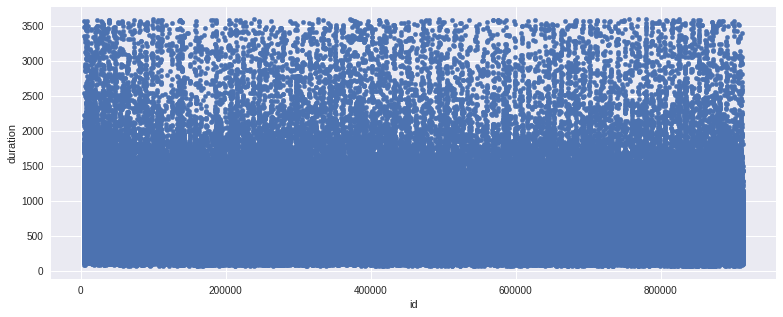

In [28]:
%matplotlib inline
clean_trips.plot.scatter(x='id',y='duration',figsize=(13,5))

<IPython.core.display.Javascript object>


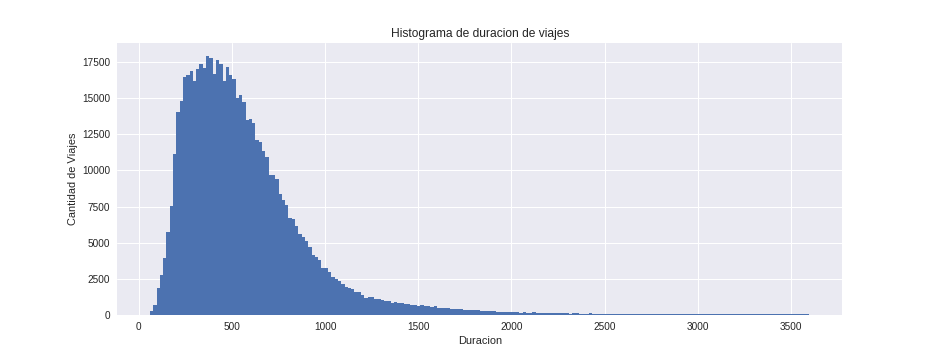

In [30]:
%matplotlib notebook

plt.figure(figsize=(13,5))
plt.hist(clean_trips.duration, bins=200)
plt.xlabel("Duracion")
plt.ylabel("Cantidad de Viajes")
plt.title("Histograma de duracion de viajes")
plt.show()

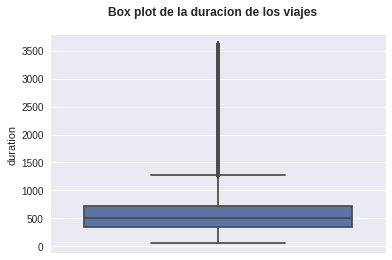

In [36]:
%matplotlib inline
import seaborn as sns

plt.subplots()[0].suptitle('Box plot de la duracion de los viajes', fontweight='bold')

sns.boxplot(x=clean_trips.duration, orient='v')

In [37]:
clean_trips.duration.describe()

count   633847.00
mean       584.50
std        383.51
min         60.00
25%        339.00
50%        502.00
75%        715.00
max       3599.00
Name: duration, dtype: float64

### Size

In [38]:
trips.shape

(669959, 11)

### Sample

In [39]:
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


## Status.csv

In [ ]:
# status = pd.read_csv('status.csv', sep=',', parse_dates=['time'], iterator=True, chunksize=1000,
#                       infer_datetime_format=True,low_memory=False)

### Types

In [ ]:
status.dtypes

### Null values

In [ ]:
status.isnull().any()

### Size

In [ ]:
status.shape

### Sample

In [ ]:
status.head()